Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [4]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 1, 3, 5, 5, 10, 4, 11, 7, 7, …
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 103, 126, 117, 109, 12…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 30, 88, 92, 75, 78, 60, 76…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 41, 0, 26, 31, 33, 0, 0,…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 235, 0, 0, 0, 192, 0, 0, …
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 43.3, 39.3, 34.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 0.183, 0.7…
$ Age                      <dbl> 31, 21, 30, 29, 30, 33, 27, 38, 60, 45, 33, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The Outcome Varaible would be the most sutable for the logistic regression model. In the glimpse that we did, it is all zeros but I did a glipmse of the "diabetes_test" and it appears that the values can be 0 or 1. It is important that the outcome for a logistic regression model is binary. 

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |     Plasma glucose concentration a 2 hours in an oral glucose tolerance test       |
| BMI         |      Body mass index (weight in kg/(height in m)^2)       |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

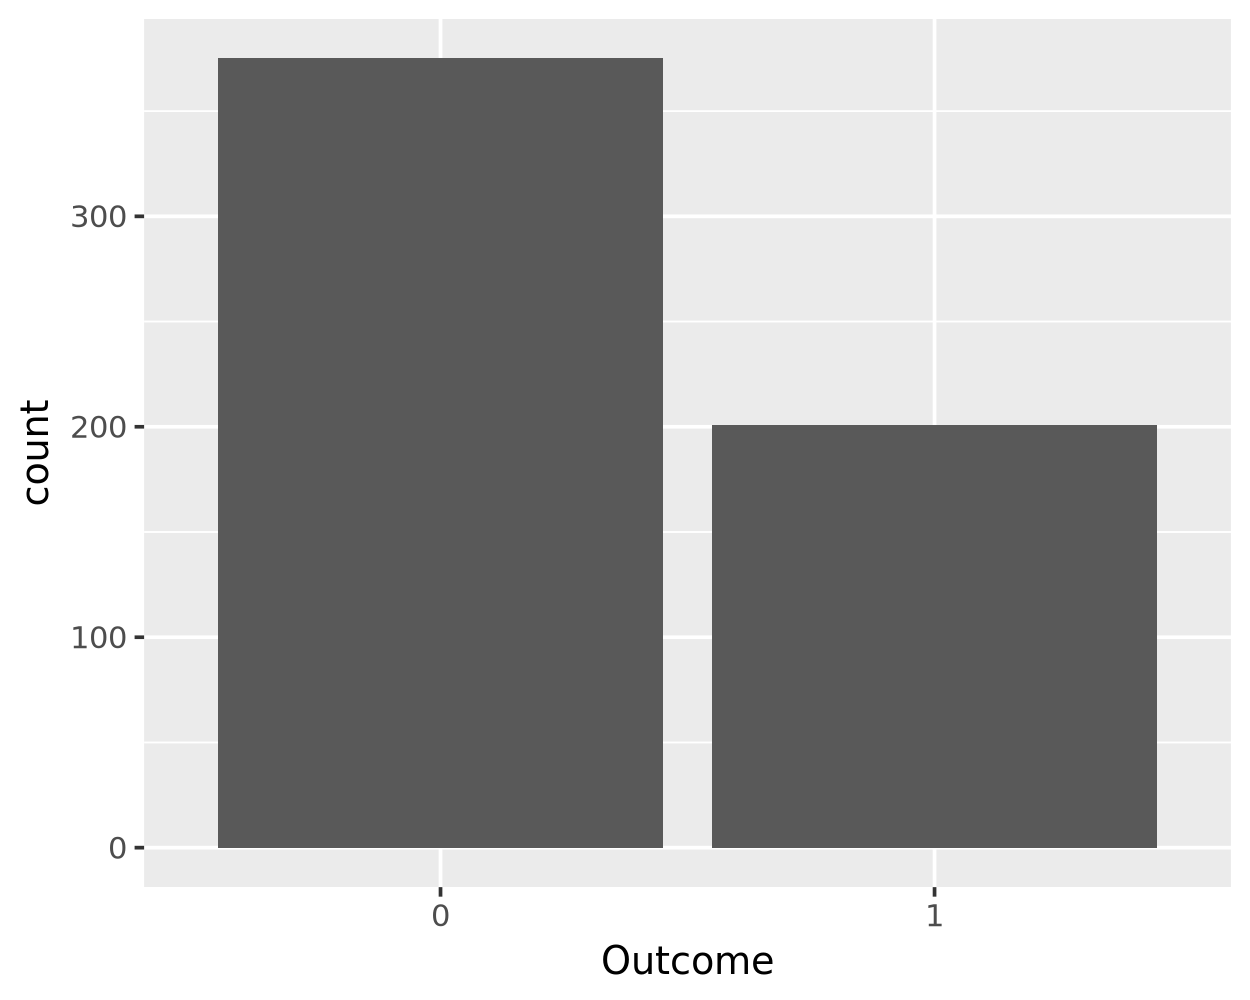

In [9]:
ggplot(data = diabetes_train) + 
  geom_bar(mapping = aes(x = Outcome))

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No the data is not balanced. It appears that there are about 175 more 0's than 1's. We do not have equal counts of each outcome.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [10]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

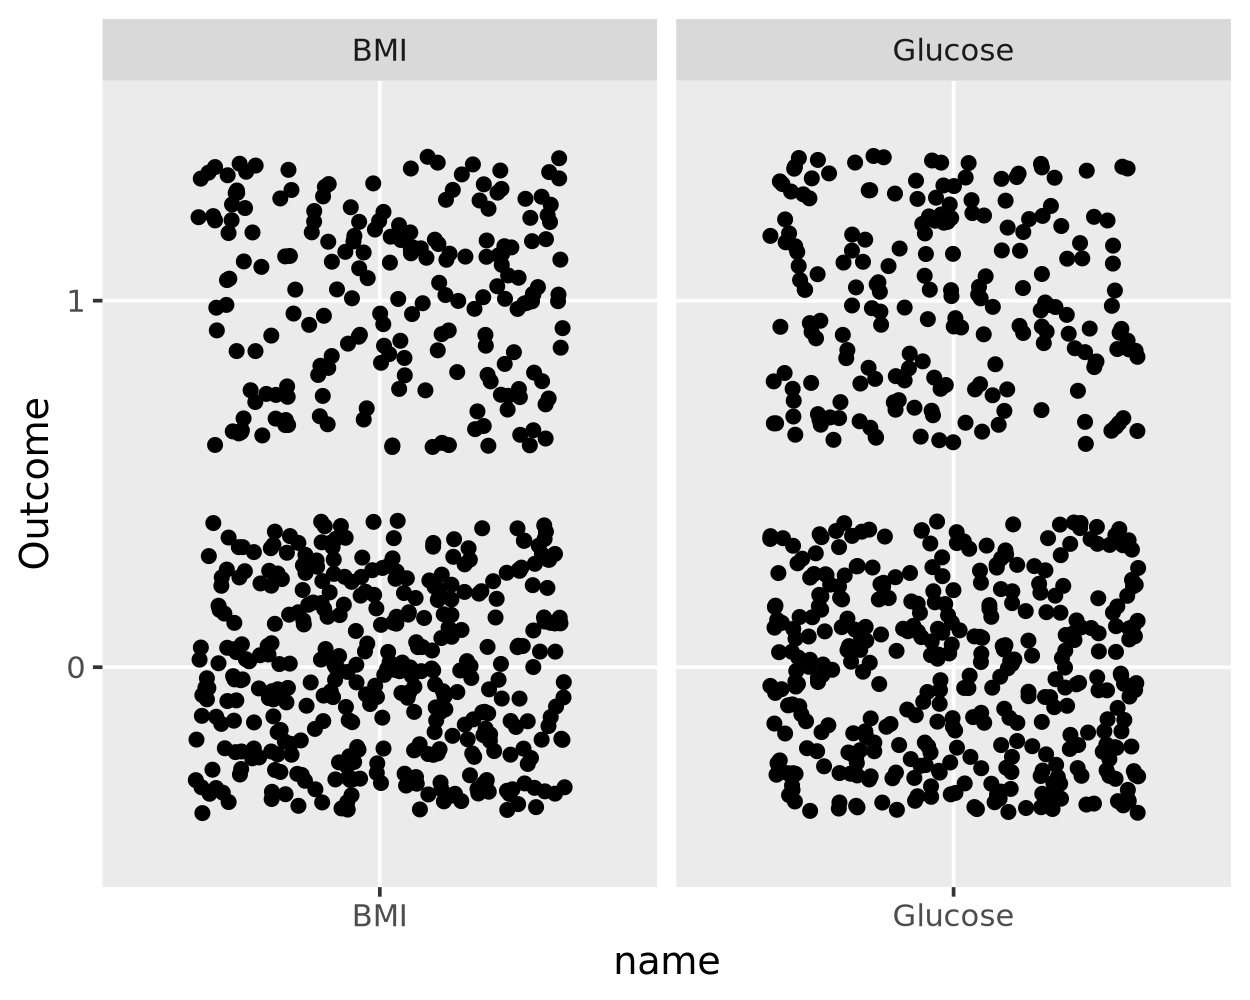

In [22]:
ggplot(plot_df) + 
    geom_jitter(aes(x = name, y = Outcome)) +
    facet_wrap(~name, ncol = 2, scales = 'free_x')


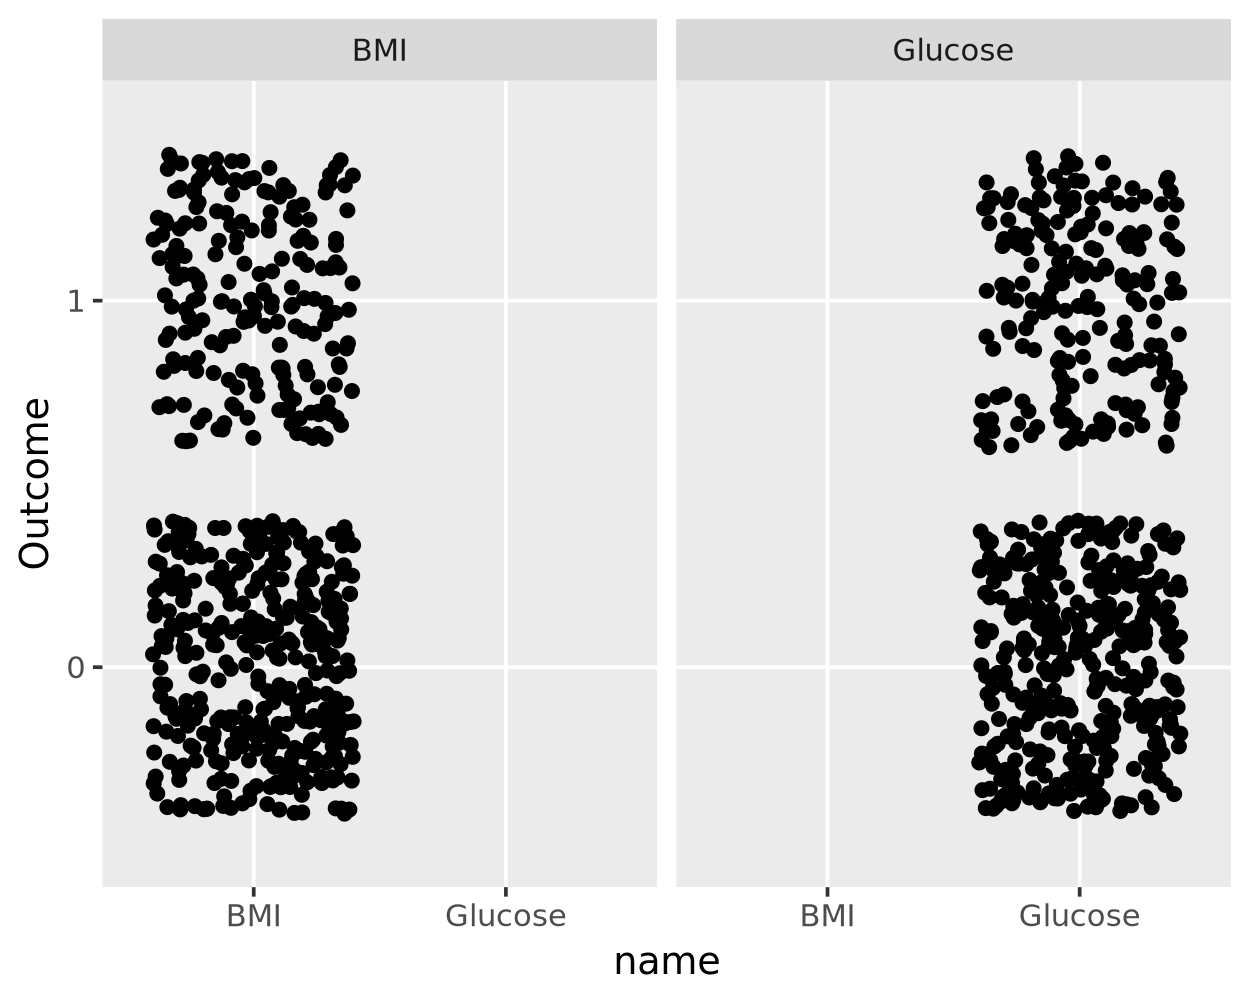

In [23]:
ggplot(plot_df) + 
    geom_jitter(aes(x = name, y = Outcome)) +
    facet_wrap(~name, ncol = 2)

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

When you remove the "scales = 'free_x' from facet_wrap it causes the graph to show name types even thought the graphs are being broken down into their own person name columns. Causes there to be empty space on the graph. Doesnt look as clean.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [24]:
mod = logistic_reg() |> set_engine('glm')

In [28]:
rec = recipe(Outcome ~ BMI + Glucose, data = diabetes_train)
rec



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



In [30]:
rec_prepped = prep(rec, diabetes_train)

rec_prepped |>
    juice() |>
    head()

BMI,Glucose,Outcome
<dbl>,<dbl>,<fct>
26.6,85,0
28.1,89,0
25.6,116,0
35.3,115,0
37.6,110,0
43.3,103,0


In [32]:
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, juice(rec_prepped))
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.21692736,0.684273161,-10.546851,5.252793e-26
BMI,0.07828665,0.014968551,5.230075,1.694410e-07
Glucose,0.03185846,0.003604645,8.838170,9.729922e-19


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [34]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)

diabetes_test_wPred |> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.3724229,0.62757708,0,137,40,35,168,43.1,2.288,33,1
0,0.9092970,0.09070301,3,78,50,32,88,31.0,0.248,26,1
1,0.1904741,0.80952586,2,197,70,45,543,30.5,0.158,53,1
0,0.6608385,0.33916151,10,139,80,0,0,27.1,1.441,57,0
0,0.7844166,0.21558342,8,99,84,0,0,35.4,0.388,50,0
0,0.9097352,0.09026477,1,97,66,15,140,23.2,0.487,22,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [35]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 119  37
         1   6  30

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

According to the confusion matrix:
- It appears that 67 individuals actaully had diabetes in the test data. I came to that conculsion by looking at the Truth options and then the 1 column because that means True.
- Of those who had diabetes, only 30 were predicted to have diabeties. I looked in the intersectin of where truth was 1 and prediction was 1. 
- There were 6 individuals who were predicted to have diabetes who did not have diabetes. I looked at the Prediction at 1 (for predicting they had diabetes) and thenthe Truth at 0 (for showing they dont actually have it)